# Project Report 

**Authors** 
Derek Nguyen, Ian Roquebert, Yessica Gaona Morales, James Helgren

**Abstract** : This will be written last (150-300 words)


# Introduction


The Common Core of Data (CCD) is the Department of Education's primary database on public elementary and secondary education in the United States. CCD is a comprenhensive, annual, national database of all public elementary and secondary schools and schools district. It contains the following seven categories of interest: 
1.   State Nonfiscal Public Elementary/Secondary Education Survey Data
2.   Local Education Agency (School District) Universe Survey Data
3.   Public Elemnetary/Secondary School Universe Survey Data
4.   National Public Education Financial Survey Data
5.   Local Education Agency (School District) Finance Survey (F-33) Data
6.   State Dropout and Completion Data
7.   Local Education Agency (School District) Universe Survey Dropout and Completion Data 

Within each category, data is organized by year. Within each year, there are multiple datasets.

> Indicators of charter, magnet, Title I, and schoolwide Title I schools were added to CCD in 1998-99, and they are presented without further editing or imputation in the Longitudinal Database

# Problem Statement 
 
Our goal is to predict poverty-stricken schools from the publicly available dataset. By predicting the poverty level, we strive to address and analyze the most significant factors that negatively impact the education system and prevent more egalitarian access and resources. Then, we would like to evaluate the effect that [Title I](https://en.wikipedia.org/wiki/Elementary_and_Secondary_Education_Act#Title_I) has provided over the years and whether it has brought significant benefits to schools in low-income areas. 
 
### Considerations
1. How many feature does each dataset have? 
2. What are the correlation between the variables? 
3. Which dataset contain information about the Title I School? 

Our focus will be on the South region of the U.S. with the following states: Alabama, Arkansas, Delaware, Florida, Georgia, Kentucky, Luisiana, Maryland, Mississipi, North Carolina, Oklahoma, South Carolina, Tennessee, Texas, Virginia, and West Virginia.

![South States](../Figures/southern-states.png)

*Current feedback to implement (by midterm date of 11/18)*:
1. Specific project goals e.g. are you trying to predict poverty-stricken schools in the hold out set.
2. Data gathering (what data do you have, figure on label distribution in training and test set)
3. Data Cleaning (what do you do with NaN values)
4. Feature Normalization and Selection: What features are you using? What normalization feature selection will you employ?
5. Figures and Exploratory Data Analysis
6. Attempt at Data Modeling.

*Incorporated below*

# Data Gathering

We used a [table generation tool](https://nces.ed.gov/ccd/elsi/tablegenerator.aspx) from the Elementary / Secondary Information System (ElSi) to gather our data. We selected data from 1998 to 2019 and used public schools as row for the table. For every public school in the Southern states previously mentioned, we extracted the following information:

- School Name 
- State Name [Public School] 
- School ID (NCES Assigned) [Public School] 
- Agency ID (NCES Assigned) [Public School]
- County Number [Public School]
- School-wide Title I [Public School] 
- Total Students All Grades (Excludes AE) [Public School]
- Free and Reduced Lunch Students [Public School]
- Male Students [Public School]
- Female Students [Public School] 
- American Indian/Alaska Native Students [Public School] 
- Asian or Asian/Pacific Islander Students [Public School] 
- Hispanic Students [Public School] 
- Black or African American Students [Public School] 
- White Students [Public School] 
- Full-Time Equivalent (FTE) Teachers [Public School] 
- Pupil/Teacher Ratio [Public School] 
- Free Lunch Eligible [Public School]

All of the above are present from the year 1998 to 2019.

More information about these can be found in the documentation located under the [README.md](README.md).

In [1]:
# TODO: Must adjust later
columns = [
    'School',
    'State',
    'ID (NCES)',
    'County Number',
    'Locale',
    'Total Students (1990-91)',
    'Total Students (1989-90)',
    'Total Students (1988-89)',
    'Total Students (1987-88)',
    'Total Students (1986-88)',
    'Free Lunch Eligible (1990-91)',
    'Free Lunch Eligible (1989-90)',
    'Free Lunch Eligible (1988-89)',
    'Free Lunch Eligible (1987-88)',
#    'Free Lunch Eligible (1986-87)', # this one is missing from our dataset, did we forget to include it?
    'American Indian/Alaska Native (1990-91)',
    'American Indian/Alaska Native (1989-90)',
    'American Indian/Alaska Native (1988-89)',
    'American Indian/Alaska Native (1987-88)',
    'American Indian/Alaska Native (1986-87)',
    'Asian or Asian/Pacific Islander (1990-91)',
    'Asian or Asian/Pacific Islander (1989-90)',
    'Asian or Asian/Pacific Islander (1988-89)',
    'Asian or Asian/Pacific Islander (1987-88)',
    'Asian or Asian/Pacific Islander (1986-87)',
    'Hispanic (1990-91)',
    'Hispanic (1989-90)',
    'Hispanic (1988-89)',
    'Hispanic (1987-88)',
    'Hispanic (1986-87)',
    'Black / African-American (1990-91)',
    'Black / African-American (1989-90)',
    'Black / African-American (1988-89)',
    'Black / African-American (1987-88)',
    'Black / African-American (1986-87)',
    'White (1990-91)',
    'White (1989-90)',
    'White (1988-89)',
    'White (1987-88)',
    'White (1986-87)'
]

# Ground Truth Labeling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ground_truth = pd.read_csv('../Data/groundtruth_98_to_03.csv', low_memory=False)
print(ground_truth.head())
print(ground_truth.info())

   Unnamed: 0 School Name State Name [Public School] Latest available year  \
0           0    ="03-MM"                                          Florida   
1           1   113-H-W-4                                          FLORIDA   
2           2  118-E-SW-5                                          FLORIDA   
3           3    12-E-C-1                                          Florida   
4           4   132-M-W-4                                          FLORIDA   

  School ID - NCES Assigned [Public School] Latest available year  \
0                                       120150006730                
1                                       120144008827                
2                                       120144008672                
3                                       120144007627                
4                                       120144008872                

  Agency ID - NCES Assigned [Public School] Latest available year  \
0                                            12

# Data Cleaning

What do you do with NaN values?

† indicates that the data are not applicable.

– indicates that the data are missing.

‡ indicates that the data do not meet NCES data quality standards.

In [4]:
print('Total Values:', ground_truth.count().sum())
print('N/A Values: ', ground_truth.isna().sum().sum())

Total Values: 3641928
N/A Values:  1244079


Later we will consider other ways to replace such as setting to 0, replacing with average, or keeping if under a certain threshold.

In [5]:
ground_truth = ground_truth[ground_truth != '†']
ground_truth = ground_truth[ground_truth != '–']
ground_truth = ground_truth[ground_truth != '‡']
#ground_truth.replace({'†': np.nan, '–': np.nan, '‡': np.nan}, inplace=True)
ground_truth.dropna(axis=0, inplace = True)
ground_truth = ground_truth[ground_truth != '="0"']

As we can see from the dataset above, there are some more data that we need to drop like, "School Name", "State Name [Public School] Latest available year"" since these are not number. 



In [6]:
ground_truth.drop('School Name', axis = 1, inplace = True)
ground_truth.drop('State Name [Public School] Latest available year', axis = 1, inplace = True)
ground_truth.drop('School ID - NCES Assigned [Public School] Latest available year', axis = 1, inplace = True)
# Let's check our data
ground_truth.head()

,Unnamed: 0,Agency ID - NCES Assigned [Public School] Latest available year,County Number [Public School] 2019-20,School-wide Title I [Public School] 1998-99,Total Students All Grades (Excludes AE) [Public School] 1998-99,Free and Reduced Lunch Students [Public School] 1998-99,Male Students [Public School] 1998-99,Female Students [Public School] 1998-99,American Indian/Alaska Native Students [Public School] 1998-99,Asian or Asian/Pacific Islander Students [Public School] 1998-99,...,Male Students [Public School] 2002-03,Female Students [Public School] 2002-03,American Indian/Alaska Native Students [Public School] 2002-03,Asian or Asian/Pacific Islander Students [Public School] 2002-03,Hispanic Students [Public School] 2002-03,Black or African American Students [Public School] 2002-03,White Students [Public School] 2002-03,Full-Time Equivalent (FTE) Teachers [Public School] 2002-03,Pupil/Teacher Ratio [Public School] 2002-03,Free Lunch Eligible [Public School] 2002-03
41,41,2102710,21101,1-Yes,285,152,140,137,NaN,NaN,...,137,144,NaN,NaN,NaN,13,268,21.20,13.30,202
42,42,4819440,48153,1-Yes,433,324,223,210,NaN,NaN,...,151,130,NaN,NaN,219,12,50,16.30,17.20,187
45,45,4830420,48293,1-Yes,656,457,340,316,2,2,...,335,312,1,3,160,223,260,45.70,14.20,405
46,46,4808580,48409,1-Yes,483,293,274,209,1,2,...,256,273,3,1,240,24,261,36.80,14.40,289
52,52,4809720,48025,1-Yes,1186,536,629,557,1,12,...,575,555,3,8,760,39,320,77.90,14.50,453


Our data looks good now, but we only want to focus on Title 1 school. So we need to drop more columns. 

In [7]:
ground_truth = ground_truth[ground_truth != '2-No']
ground_truth.dropna(inplace = True)
# Let's check our dataset
ground_truth.head()

,Unnamed: 0,Agency ID - NCES Assigned [Public School] Latest available year,County Number [Public School] 2019-20,School-wide Title I [Public School] 1998-99,Total Students All Grades (Excludes AE) [Public School] 1998-99,Free and Reduced Lunch Students [Public School] 1998-99,Male Students [Public School] 1998-99,Female Students [Public School] 1998-99,American Indian/Alaska Native Students [Public School] 1998-99,Asian or Asian/Pacific Islander Students [Public School] 1998-99,...,Male Students [Public School] 2002-03,Female Students [Public School] 2002-03,American Indian/Alaska Native Students [Public School] 2002-03,Asian or Asian/Pacific Islander Students [Public School] 2002-03,Hispanic Students [Public School] 2002-03,Black or African American Students [Public School] 2002-03,White Students [Public School] 2002-03,Full-Time Equivalent (FTE) Teachers [Public School] 2002-03,Pupil/Teacher Ratio [Public School] 2002-03,Free Lunch Eligible [Public School] 2002-03
478,478,2400510,24033,1-Yes,661,506,332,329,8,36,...,231,242,1,33,263,169,7,46.30,10.20,331
692,692,4834290,48277,1-Yes,1037,563,551,486,10,3,...,557,481,12,8,74,355,589,78.60,13.20,527
869,869,4816230,48113,1-Yes,921,684,468,453,4,70,...,491,451,1,33,729,151,28,74.70,12.60,618
939,939,4816740,48121,1-Yes,510,326,259,251,2,2,...,281,273,4,4,274,71,201,43.70,12.70,280
950,950,4846680,48141,1-Yes,649,313,318,331,4,6,...,374,391,4,5,733,5,18,51.10,15.00,328


Now we want to know the percentage of Free and Reduced Lunch Students%, and Free Lunch Elible % of each school for each year. So we are going to create two new columns:  
*   Free and Reduced Lunch Students%
*   Free Lunch Eligible % 

(We will come back to this code and refactor it A LOT to make it shorter)

In [8]:
# Creating Free and Reduced Lunch Students 
ground_truth['Free and Reduced Lunch Students %(1998-99)'] = ground_truth['Free and Reduced Lunch Students [Public School] 1998-99'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1998-99'].astype(float)
ground_truth['Free and Reduced Lunch Students %(1999-00)'] = ground_truth['Free and Reduced Lunch Students [Public School] 1999-00'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1999-00'].astype(float)
ground_truth['Free and Reduced Lunch Students %(2000-01)'] = ground_truth['Free and Reduced Lunch Students [Public School] 2000-01'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2000-01'].astype(float)
ground_truth['Free and Reduced Lunch Students %(2001-02)'] = ground_truth['Free and Reduced Lunch Students [Public School] 2001-02'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2001-02'].astype(float)
ground_truth['Free and Reduced Lunch Students %(2002-03)'] = ground_truth['Free and Reduced Lunch Students [Public School] 2002-03'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2002-03'].astype(float)

# Creating Free Lunch Eligible % 
ground_truth['Free Lunch Eligible %(1998-99)'] = ground_truth['Free Lunch Eligible [Public School] 1998-99'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1998-99'].astype(float)
ground_truth['Free Lunch Eligible %(1999-00)'] = ground_truth['Free Lunch Eligible [Public School] 1999-00'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1999-00'].astype(float)
ground_truth['Free Lunch Eligible %(2000-01)'] = ground_truth['Free Lunch Eligible [Public School] 2000-01'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2000-01'].astype(float)
ground_truth['Free Lunch Eligible %(2001-02)'] = ground_truth['Free Lunch Eligible [Public School] 2001-02'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2001-02'].astype(float)
ground_truth['Free Lunch Eligible %(2002-03)'] = ground_truth['Free Lunch Eligible [Public School] 2002-03'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2002-03'].astype(float)
ground_truth.head()

,Unnamed: 0,Agency ID - NCES Assigned [Public School] Latest available year,County Number [Public School] 2019-20,School-wide Title I [Public School] 1998-99,Total Students All Grades (Excludes AE) [Public School] 1998-99,Free and Reduced Lunch Students [Public School] 1998-99,Male Students [Public School] 1998-99,Female Students [Public School] 1998-99,American Indian/Alaska Native Students [Public School] 1998-99,Asian or Asian/Pacific Islander Students [Public School] 1998-99,...,Free and Reduced Lunch Students %(1998-99),Free and Reduced Lunch Students %(1999-00),Free and Reduced Lunch Students %(2000-01),Free and Reduced Lunch Students %(2001-02),Free and Reduced Lunch Students %(2002-03),Free Lunch Eligible %(1998-99),Free Lunch Eligible %(1999-00),Free Lunch Eligible %(2000-01),Free Lunch Eligible %(2001-02),Free Lunch Eligible %(2002-03)
478,478,2400510,24033,1-Yes,661,506,332,329,8,36,...,0.765507,0.769716,0.766154,0.791045,0.892178,0.583964,0.589905,0.584615,0.611940,0.699789
692,692,4834290,48277,1-Yes,1037,563,551,486,10,3,...,0.542912,0.542584,0.523223,0.527559,0.564547,0.452266,0.466986,0.471090,0.465551,0.507707
869,869,4816230,48113,1-Yes,921,684,468,453,4,70,...,0.742671,0.635108,0.789687,0.758829,0.701699,0.672096,0.575937,0.737108,0.699294,0.656051
939,939,4816740,48121,1-Yes,510,326,259,251,2,2,...,0.639216,0.567718,0.639155,0.551601,0.628159,0.511765,0.461967,0.547025,0.444840,0.505415
950,950,4846680,48141,1-Yes,649,313,318,331,4,6,...,0.482280,0.534362,0.545455,0.543011,0.550327,0.286595,0.387097,0.387701,0.427419,0.428758


Now we want to know the percentage of race. Let's add a few columns to our data set: 
*   American Indian/Alaska Native Students %
*   Asian or Asian/Pacific Islander Students %
*   Hispanic Students %
*   Black or African American Students %
*   White Student % 

In [9]:
# Creating American Indian/ Alaska Native Students % 
ground_truth['American Indian/Alaska Native Students %(1998-99)'] = ground_truth['American Indian/Alaska Native Students [Public School] 1998-99'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1998-99'].astype(float)
ground_truth['American Indian/Alaska Native Students %(1999-00)'] = ground_truth['American Indian/Alaska Native Students [Public School] 1999-00'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1999-00'].astype(float)
ground_truth['American Indian/Alaska Native Students %(2000-01)'] = ground_truth['American Indian/Alaska Native Students [Public School] 2000-01'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2000-01'].astype(float)
ground_truth['American Indian/Alaska Native Students %(2001-02)'] = ground_truth['American Indian/Alaska Native Students [Public School] 2001-02'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2001-02'].astype(float)
ground_truth['American Indian/Alaska Native Students %(2002-03)'] = ground_truth['American Indian/Alaska Native Students [Public School] 2002-03'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2002-03'].astype(float)

ground_truth['Hispanic Student % (1998-99)'] = ground_truth['Hispanic Students [Public School] 1998-99'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1998-99'].astype(float)
ground_truth['Hispanic Student % (1999-00)'] = ground_truth['Hispanic Students [Public School] 1999-00'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1999-00'].astype(float)
ground_truth['Hispanic Student % (2000-01)'] = ground_truth['Hispanic Students [Public School] 2000-01'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2000-01'].astype(float)
ground_truth['Hispanic Student % (2001-02)'] = ground_truth['Hispanic Students [Public School] 2001-02'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2001-02'].astype(float)
ground_truth['Hispanic Student % (2002-03)'] = ground_truth['Hispanic Students [Public School] 2002-03'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2002-03'].astype(float)

ground_truth['Asian or Asian/Pacific Islander Students %(1998-99)'] = ground_truth['Asian or Asian/Pacific Islander Students [Public School] 1998-99'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1998-99'].astype(float)
ground_truth['Asian or Asian/Pacific Islander Students %(1999-00)'] = ground_truth['Asian or Asian/Pacific Islander Students [Public School] 1999-00'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1999-00'].astype(float)
ground_truth['Asian or Asian/Pacific Islander Students %(2000-01)'] = ground_truth['Asian or Asian/Pacific Islander Students [Public School] 2000-01'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2000-01'].astype(float)
ground_truth['Asian or Asian/Pacific Islander Students %(2001-02)'] = ground_truth['Asian or Asian/Pacific Islander Students [Public School] 2001-02'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2001-02'].astype(float)
ground_truth['Asian or Asian/Pacific Islander Students %(2002-03)'] = ground_truth['Asian or Asian/Pacific Islander Students [Public School] 2002-03'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2002-03'].astype(float)

ground_truth['Black or African American Students %(1998-99)'] = ground_truth['Black or African American Students [Public School] 1998-99'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1998-99'].astype(float)
ground_truth['Black or African American Students %(1999-00)'] = ground_truth['Black or African American Students [Public School] 1999-00'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1999-00'].astype(float)
ground_truth['Black or African American Students %(2000-01)'] = ground_truth['Black or African American Students [Public School] 2000-01'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2000-01'].astype(float)
ground_truth['Black or African American Students %(2001-02)'] = ground_truth['Black or African American Students [Public School] 2001-02'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2001-02'].astype(float)
ground_truth['Black or African American Students %(2002-03)'] = ground_truth['Black or African American Students [Public School] 2002-03'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2002-03'].astype(float)

ground_truth['White Students %(1998-99)'] = ground_truth['White Students [Public School] 1998-99'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1998-99'].astype(float)
ground_truth['White Students %(1999-00)'] = ground_truth['White Students [Public School] 1999-00'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1999-00'].astype(float)
ground_truth['White Students %(2000-01)'] = ground_truth['White Students [Public School] 2000-01'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2000-01'].astype(float)
ground_truth['White Students %(2001-02)'] = ground_truth['White Students [Public School] 2001-02'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2001-02'].astype(float)
ground_truth['White Students %(2002-03)'] = ground_truth['White Students [Public School] 2002-03'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2002-03'].astype(float)

ground_truth.head()

,Unnamed: 0,Agency ID - NCES Assigned [Public School] Latest available year,County Number [Public School] 2019-20,School-wide Title I [Public School] 1998-99,Total Students All Grades (Excludes AE) [Public School] 1998-99,Free and Reduced Lunch Students [Public School] 1998-99,Male Students [Public School] 1998-99,Female Students [Public School] 1998-99,American Indian/Alaska Native Students [Public School] 1998-99,Asian or Asian/Pacific Islander Students [Public School] 1998-99,...,Black or African American Students %(1998-99),Black or African American Students %(1999-00),Black or African American Students %(2000-01),Black or African American Students %(2001-02),Black or African American Students %(2002-03),White Students %(1998-99),White Students %(1999-00),White Students %(2000-01),White Students %(2001-02),White Students %(2002-03)
478,478,2400510,24033,1-Yes,661,506,332,329,8,36,...,0.391831,0.376972,0.360000,0.331343,0.357294,0.015129,0.011041,0.012308,0.007463,0.014799
692,692,4834290,48277,1-Yes,1037,563,551,486,10,3,...,0.323047,0.346411,0.349763,0.349409,0.342004,0.637416,0.608612,0.588626,0.570866,0.567437
869,869,4816230,48113,1-Yes,921,684,468,453,4,70,...,0.168295,0.174556,0.153691,0.156408,0.160297,0.077090,0.071992,0.018200,0.029263,0.029724
939,939,4816740,48121,1-Yes,510,326,259,251,2,2,...,0.109804,0.120594,0.107486,0.124555,0.128159,0.384314,0.346939,0.301344,0.396797,0.362816
950,950,4846680,48141,1-Yes,649,313,318,331,4,6,...,0.013867,0.015428,0.012032,0.013441,0.006536,0.044684,0.040673,0.032086,0.024194,0.023529


We can also add two more columns about the gender percentage
*   Male Students %
*   Female students %

In [10]:
ground_truth['Male Students % (1998-99)'] = ground_truth['Male Students [Public School] 1998-99'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1998-99'].astype(float)
ground_truth['Male Students % (1999-00)'] = ground_truth['Male Students [Public School] 1999-00'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1999-00'].astype(float)
ground_truth['Male Students % (2000-01)'] = ground_truth['Male Students [Public School] 2000-01'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2000-01'].astype(float)
ground_truth['Male Students % (2001-02)'] = ground_truth['Male Students [Public School] 2001-02'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2001-02'].astype(float)
ground_truth['Male Students % (2002-03)'] = ground_truth['Male Students [Public School] 2002-03'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2002-03'].astype(float)

ground_truth['Female Students % (1998-99)'] = ground_truth['Female Students [Public School] 1998-99'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1998-99'].astype(float)
ground_truth['Female Students % (1999-00)'] = ground_truth['Female Students [Public School] 1999-00'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 1999-00'].astype(float)
ground_truth['Female Students % (2000-01)'] = ground_truth['Female Students [Public School] 2000-01'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2000-01'].astype(float)
ground_truth['Female Students % (2001-02)'] = ground_truth['Female Students [Public School] 2001-02'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2001-02'].astype(float)
ground_truth['Female Students % (2002-03)'] = ground_truth['Female Students [Public School] 2002-03'].astype(float) / ground_truth['Total Students All Grades (Excludes AE) [Public School] 2002-03'].astype(float)

ground_truth.head()

,Unnamed: 0,Agency ID - NCES Assigned [Public School] Latest available year,County Number [Public School] 2019-20,School-wide Title I [Public School] 1998-99,Total Students All Grades (Excludes AE) [Public School] 1998-99,Free and Reduced Lunch Students [Public School] 1998-99,Male Students [Public School] 1998-99,Female Students [Public School] 1998-99,American Indian/Alaska Native Students [Public School] 1998-99,Asian or Asian/Pacific Islander Students [Public School] 1998-99,...,Male Students % (1998-99),Male Students % (1999-00),Male Students % (2000-01),Male Students % (2001-02),Male Students % (2002-03),Female Students % (1998-99),Female Students % (1999-00),Female Students % (2000-01),Female Students % (2001-02),Female Students % (2002-03)
478,478,2400510,24033,1-Yes,661,506,332,329,8,36,...,0.502269,0.493691,0.484615,0.480597,0.488372,0.497731,0.506309,0.515385,0.519403,0.511628
692,692,4834290,48277,1-Yes,1037,563,551,486,10,3,...,0.531340,0.538756,0.527962,0.539370,0.536609,0.468660,0.461244,0.472038,0.460630,0.463391
869,869,4816230,48113,1-Yes,921,684,468,453,4,70,...,0.508143,0.512821,0.511628,0.511604,0.521231,0.491857,0.487179,0.488372,0.488396,0.478769
939,939,4816740,48121,1-Yes,510,326,259,251,2,2,...,0.507843,0.521336,0.533589,0.507117,0.507220,0.492157,0.478664,0.466411,0.492883,0.492780
950,950,4846680,48141,1-Yes,649,313,318,331,4,6,...,0.489985,0.500701,0.487968,0.479839,0.488889,0.510015,0.499299,0.512032,0.520161,0.511111


Our dataset looks good now. However, we need to seperate the datas into the correct year. 

In [11]:
yr1998_1999 = pd.DataFrame(ground_truth, columns = ['Free and Reduced Lunch Students %(1998-99)', 'Free Lunch Eligible %(1998-99)', 'American Indian/Alaska Native Students %(1998-99)', 'Hispanic Student % (1998-99)', 'Asian or Asian/Pacific Islander Students %(1998-99)',
                                                    'Black or African American Students %(1998-99)', 'White Students %(1998-99)',  'Pupil/Teacher Ratio [Public School] 1998-99', 'Male Students % (1998-99)', 'Female Students % (1998-99)'])
yr1999_2000 = pd.DataFrame(ground_truth, columns = ['Free and Reduced Lunch Students %(1999-00)', 'Free Lunch Eligible %(1999-00)', 'American Indian/Alaska Native Students %(1999-00)', 'Hispanic Student % (1999-00)', 'Asian or Asian/Pacific Islander Students %(1999-00)',
                                                    'Black or African American Students %(1999-00)', 'White Students %(1999-00)',  'Pupil/Teacher Ratio [Public School] 1999-00', 'Male Students % (1999-00)', 'Female Students % (1999-00)'])
yr2000_2001 = pd.DataFrame(ground_truth, columns = ['Free and Reduced Lunch Students %(2000-01)', 'Free Lunch Eligible %(2000-01)', 'American Indian/Alaska Native Students %(2000-01)', 'Hispanic Student % (2000-01)', 'Asian or Asian/Pacific Islander Students %(2000-01)',
                                                    'Black or African American Students %(2000-01)', 'White Students %(2000-01)',  'Pupil/Teacher Ratio [Public School] 2000-01', 'Male Students % (2000-01)', 'Female Students % (2000-01)'])
yr2001_2002 = pd.DataFrame(ground_truth, columns = ['Free and Reduced Lunch Students %(2001-02)', 'Free Lunch Eligible %(2001-02)', 'American Indian/Alaska Native Students % (2001-02)', 'Hispanic Student % (2001-02)', 'Asian or Asian/Pacific Islander Students %(2001-02)',
                                                    'Black or African American Students %(2001-02)', 'White Students %(2001-02)',  'Pupil/Teacher Ratio [Public School] 2001-02', 'Male Students % (2001-02)', 'Female Students % (2001-02)'])
yr2002_2003 = pd.DataFrame(ground_truth, columns = ['Free and Reduced Lunch Students %(2002-03)', 'Free Lunch Eligible %(2002-03)', 'American Indian/Alaska Native Students %(2002-03)', 'Hispanic Student % (2002-03)', 'Asian or Asian/Pacific Islander Students %(2002-03)',
                                                    'Black or African American Students %(2002-03)', 'White Students %(2002-03)',  'Pupil/Teacher Ratio [Public School] 2002-03', 'Male Students % (2002-03)', 'Female Students % (2002-03)'])

In [12]:
print('Updated Values:', ground_truth.count().sum())
print('Updated N/A Values: ', ground_truth.isna().sum().sum())

Updated Values: 94355
Updated N/A Values:  0


# Feature Normalization and Selection

What features are you using? 

What normalization feature selection will you employ?

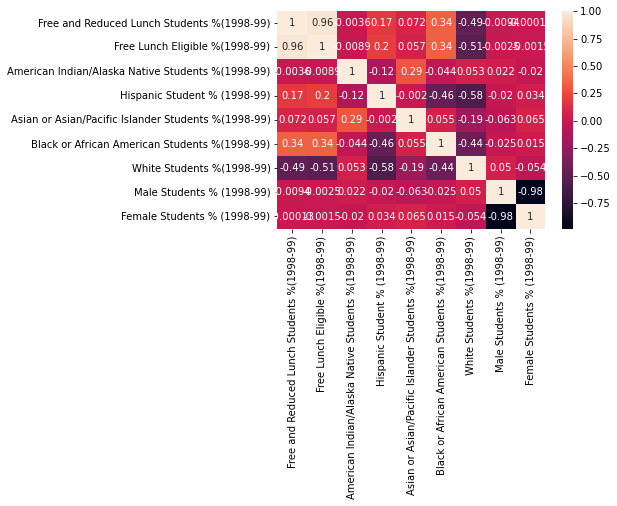

In [13]:
corrMatrix = yr1998_1999.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

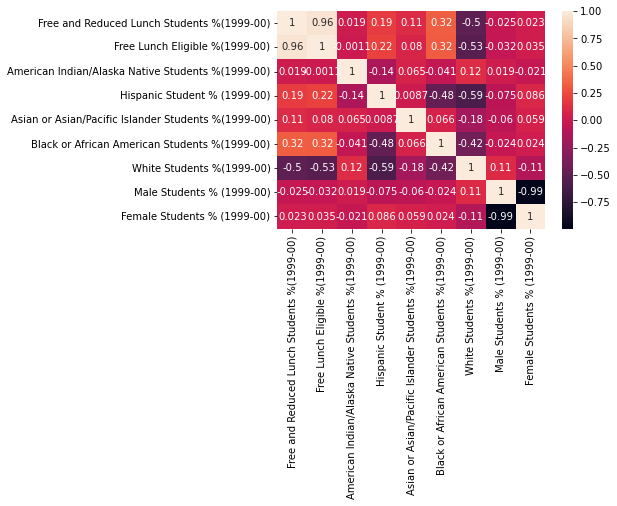

In [14]:
corrMatrix = yr1999_2000.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

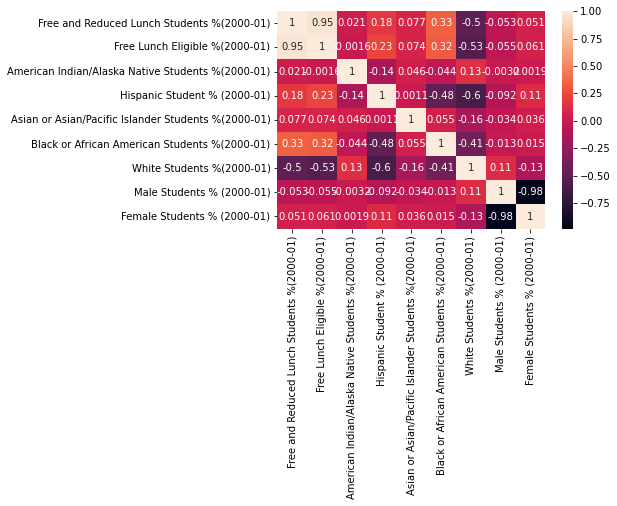

In [15]:
corrMatrix = yr2000_2001.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

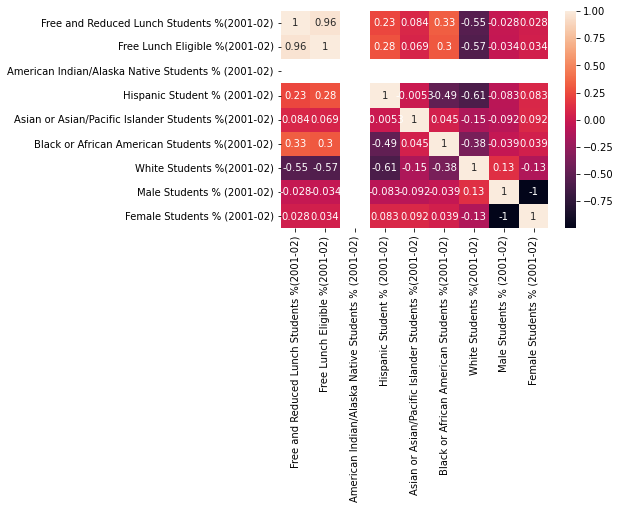

In [16]:
corrMatrix = yr2001_2002.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

                                                    Free and Reduced Lunch Students %(2002-03)  \
Free and Reduced Lunch Students %(2002-03)                                            1.000000   
Free Lunch Eligible %(2002-03)                                                        0.951250   
American Indian/Alaska Native Students %(2002-03)                                    -0.027840   
Hispanic Student % (2002-03)                                                          0.230721   
Asian or Asian/Pacific Islander Students %(2002...                                    0.096326   
Black or African American Students %(2002-03)                                         0.315002   
White Students %(2002-03)                                                            -0.544043   
Male Students % (2002-03)                                                             0.034272   
Female Students % (2002-03)                                                          -0.033993   

                   

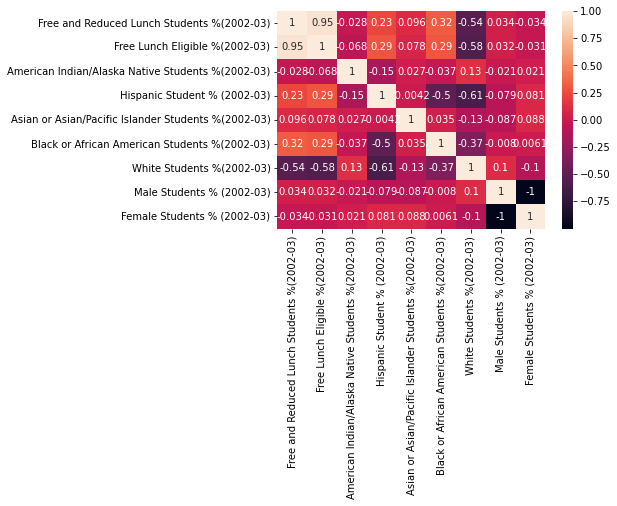

In [17]:
corrMatrix = yr2002_2003.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)
plt.show()

Something that should be noted is the correlation of the Feature and Reduced Lunch Students percentage and the percentage of the school population that have more minorities. Specifically, there is a stronger positive correlation with the number of students eligible for free lunches and the percentage of Hispanic and Black or African American students.

Additionally, there is a stronger negative correlation with higher school populations of white students and the percentage of students eligible for free lunches.

# Exploratory Data Analysis

**Based on the source information [here](../Sources/coe_clb.pdf), we determine the range for no poverty, high poverty, strict poverty to be (0, 0.33], (0.33, 0.66], (0.66, 1], respectively.**

In [18]:
eda_df = pd.read_csv('../Data/groundtruth_98_to_03.csv', low_memory=False)
school_per_state = eda_df.groupby('State Name [Public School] Latest available year')['State Name [Public School] Latest available year'].agg(['count'])

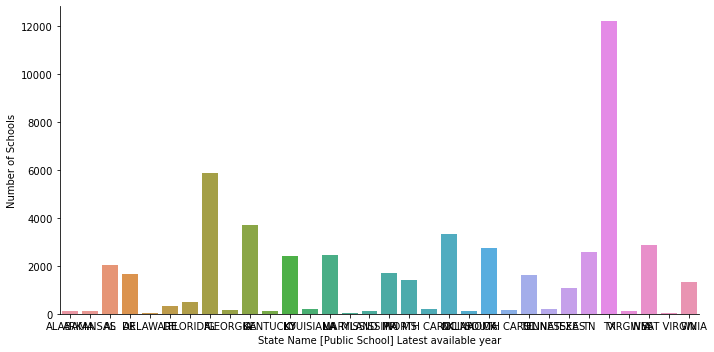

In [19]:
state_abbreviations = {'Alabama':'AL', 'Arkansas':'AR', 'Delaware':'DE', 'Florida':'FL', 'Georgia':'GA', 'Kentucky':'KY', 'Louisiana':'LA', 'Maryland':'MA', 'Mississippi':'MS', 'North Carolina':'NC', 'Oklahoma':'OK', 'South Carolina':'SC', 'Tennessee':'TN', 'Texas':'TX', 'Virginia':'VA', 'West Virginia':'WV'}
school_per_state.reset_index(inplace=True)
school_per_state.replace(state_abbreviations, inplace=True)
school_per_state.rename(columns={'count': 'Number of Schools'}, inplace=True)
sns.catplot(x='State Name [Public School] Latest available year', y='Number of Schools', aspect=2, kind='bar', data=school_per_state)

# TODO: We will fix these labels displays later
# TODO: We will look plot other features once we further organize how they are stored in the dataframe

# Data Modeling

What supervised/unsupervised techniques you plan to use (have used) for modeling outcomes?

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [21]:
# TODO: Use 'Title I' columns as y, Rest of scalar values as X

y = ground_truth['School-wide Title I [Public School] 1998-99'].values
ground_truth.drop(columns=['School-wide Title I [Public School] 1998-99'], inplace=True)
X = ground_truth.values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [22]:
# TODO: Tweak pipeline and finishing cleaning up data in order to 

# Model Considerations, see: https://www.kdnuggets.com/2020/05/guide-choose-right-machine-learning-algorithm.html

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC())
])

#TODO: Handle errors and add model to pipeline + more considerations

#pipe.fit(X_train, y_train)

#pipe.score(X_test, y_test)

#y_pred = pipe.predict(X_train)